# Analiza wykonanych testów

In [92]:
import pandas as pd
import numpy as np
import json

In [93]:
def get_test_data(file_name):
    with open(file_name, "r") as f:
        return json.loads(f.read())

In [94]:
test_data = get_test_data("test_results.json")

In [95]:
len(test_data)

23

## Otrzymane wartości accuracy

In [96]:
df = pd.DataFrame({"accuracy": [t["accuracy"] for t in test_data],
                 "hidden_layer_num": [str(t["hidden_layer_neurons_num"]) for t in test_data],
                  "hidden_activation_functions_names": [str(t["hidden_activation_functions_names"]) for t in test_data],
                 "epochs": [t["epochs"] for t in test_data],
                  "error_function_name": [t["error_function_name"] for t in test_data],
                  "regularization": [t["regularization"] for t in test_data],
                  "momentum_presence": [t["momentum_presence"] for t in test_data],
                  "image_augmentation": [t["image_augmentation"] for t in test_data]})

In [97]:
df.sort_values(["accuracy"], ascending = False)

,accuracy,epochs,error_function_name,hidden_activation_functions_names,hidden_layer_num,image_augmentation,momentum_presence,regularization
19,0.9712,30,cross_entropy,"['tanh', 'tanh']","[128, 128]",False,True,False
22,0.9704,30,cross_entropy,"['relu', 'relu']","[128, 128]",True,False,False
12,0.9683,20,cross_entropy,"['tanh', 'tanh', 'tanh']","[128, 128, 128]",True,False,False
11,0.9682,20,cross_entropy,"['tanh', 'tanh', 'tanh']","[128, 128, 128]",False,False,False
8,0.9659,20,cross_entropy,"['relu', 'relu']","[128, 128]",True,False,False
4,0.9637,20,cross_entropy,"['tanh', 'tanh']","[128, 128]",True,False,False
17,0.9637,20,cross_entropy,"['tanh', 'tanh']","[128, 128]",False,True,False
3,0.9633,20,cross_entropy,"['tanh', 'tanh']","[128, 128]",False,False,False
15,0.9620,20,cross_entropy,"['tanh', 'tanh']","[128, 128]",True,False,False
7,0.9611,20,cross_entropy,"['relu', 'relu']","[128, 128]",False,False,False


Najlepsze accuracy daje wybranie cross_entropy wraz funkcją aktywacji tanh bądź relu. Zwiększenie liczby warstw o jedną nie wpływa pozytywnie na jakość klasyfikacji.

# Obliczenie skuteczności klasyfikacji każdej z klas dla najlepszego modelu 

In [108]:
best_id = 19

In [109]:
stats = test_data[best_id]["stat"]

In [110]:
from sklearn.metrics import classification_report

In [111]:
class_report =classification_report([x[1] for x in stats],
                      [x[0] for x in stats])

In [112]:
print(class_report)

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       980
        1.0       0.98      0.99      0.98      1135
        2.0       0.97      0.98      0.98      1032
        3.0       0.96      0.98      0.97      1010
        4.0       0.96      0.97      0.97       982
        5.0       0.97      0.96      0.96       892
        6.0       0.97      0.97      0.97       958
        7.0       0.97      0.97      0.97      1028
        8.0       0.98      0.96      0.97       974
        9.0       0.97      0.94      0.96      1009

avg / total       0.97      0.97      0.97     10000



## Obrazki niepoprawnie sklasyfikowane

In [113]:
import matplotlib.pyplot as plt

In [114]:
images = pd.read_csv("./data/mnist_test.csv", sep=",", header=None)
images.loc[:, 1:] /= 255.0
images=images.as_matrix()

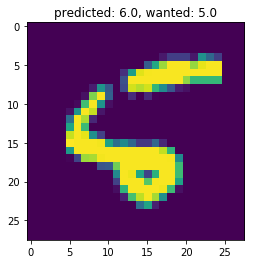

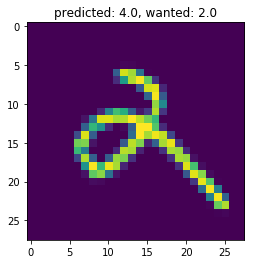

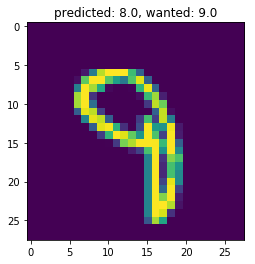

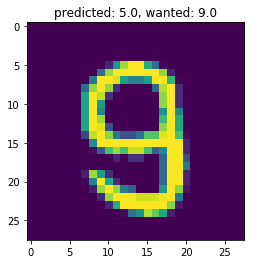

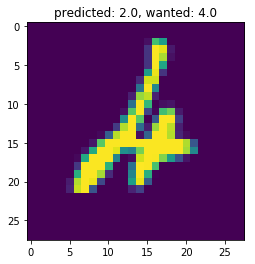

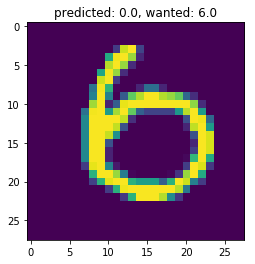

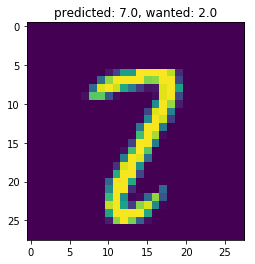

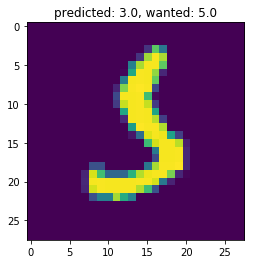

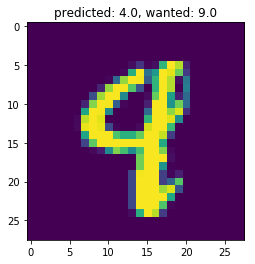

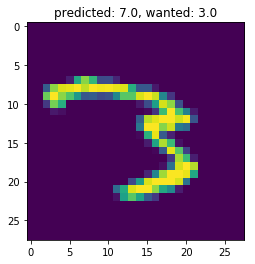

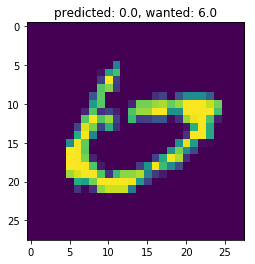

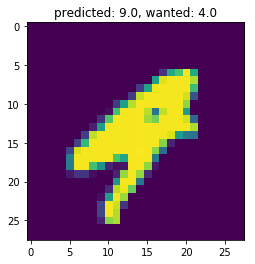

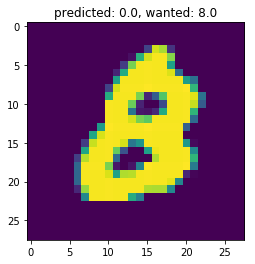

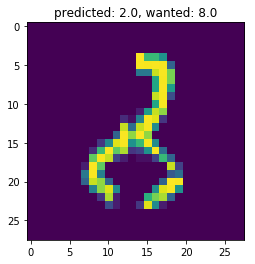

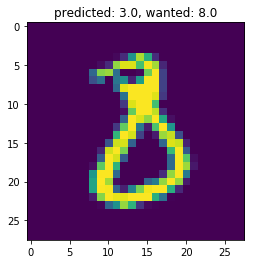

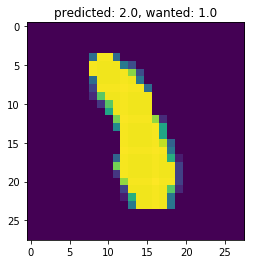

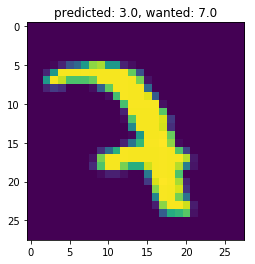

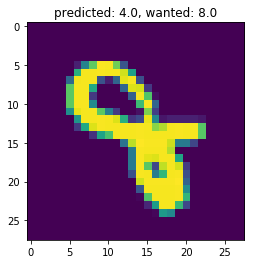

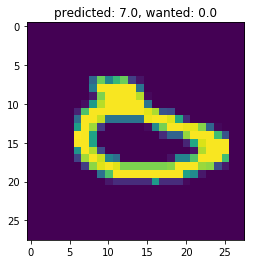

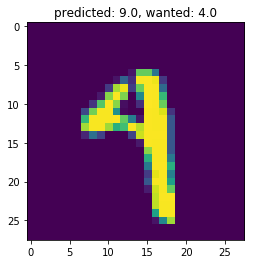

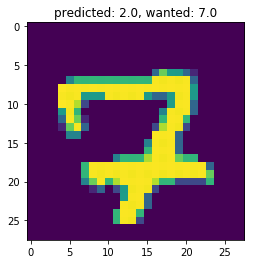

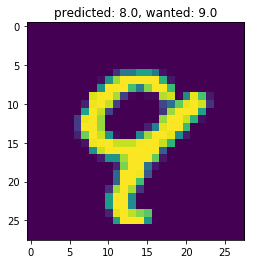

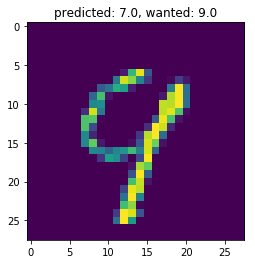

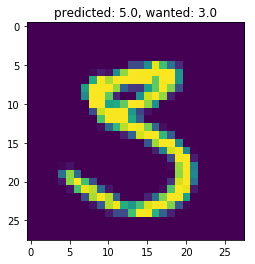

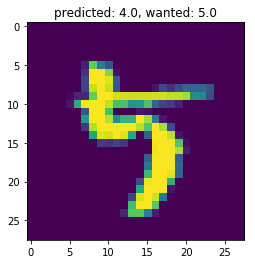

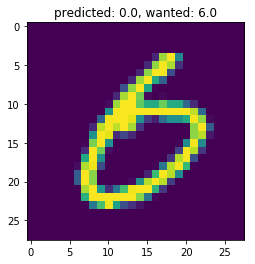

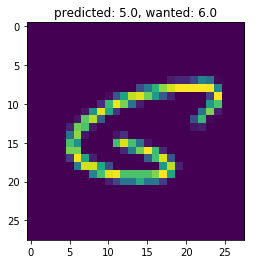

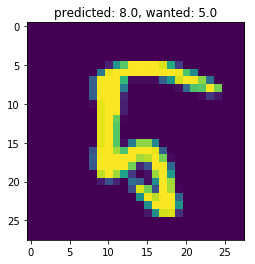

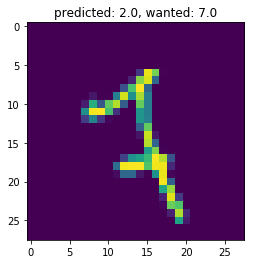

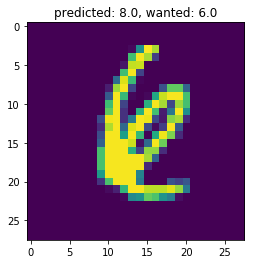

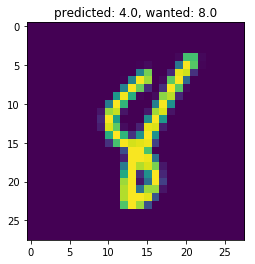

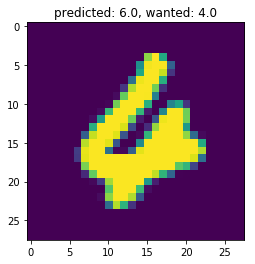

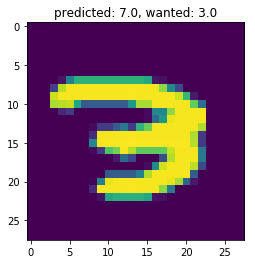

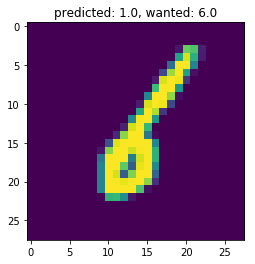

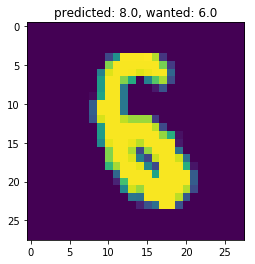

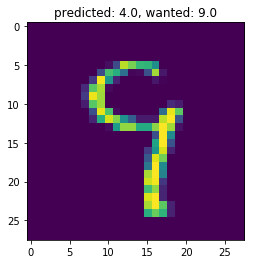

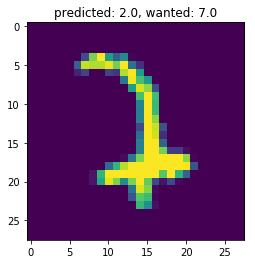

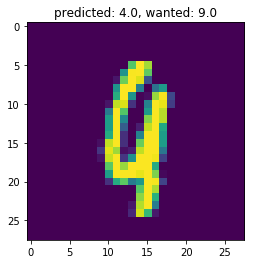

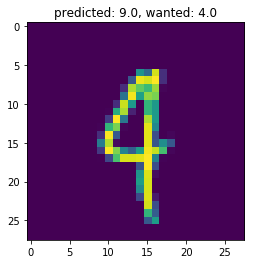

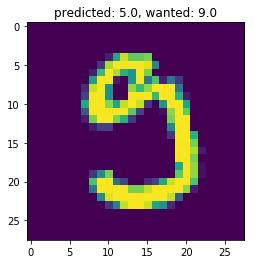

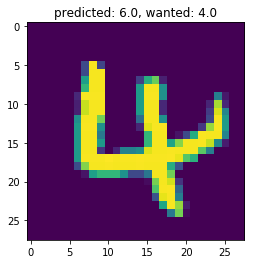

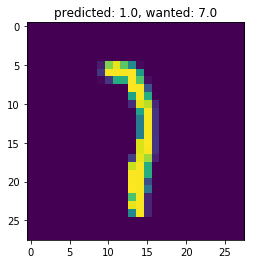

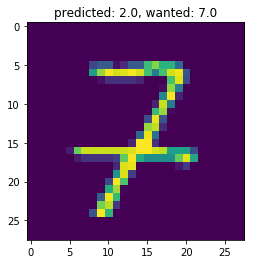

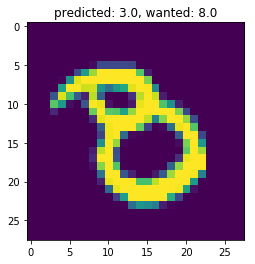

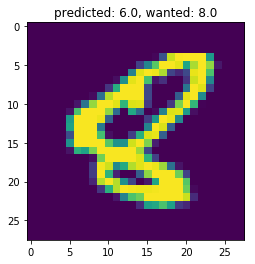

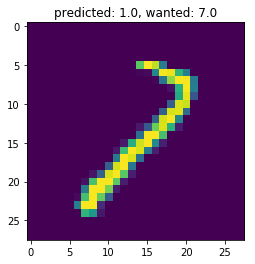

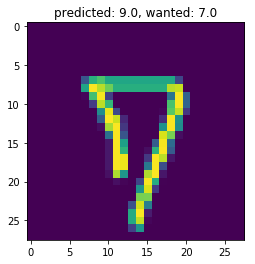

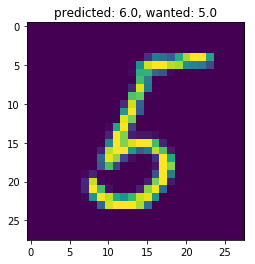

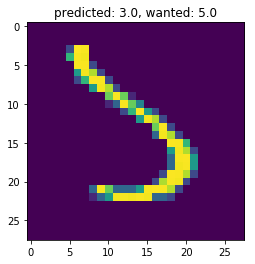

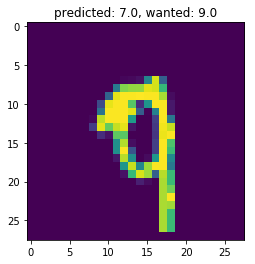

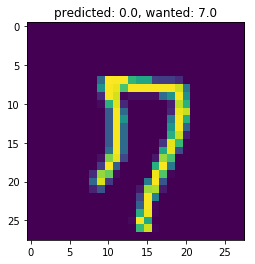

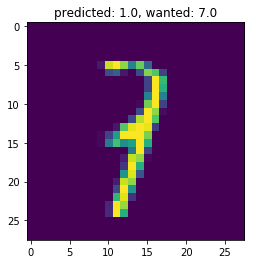

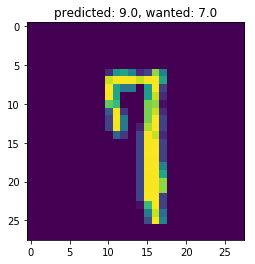

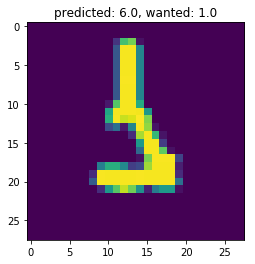

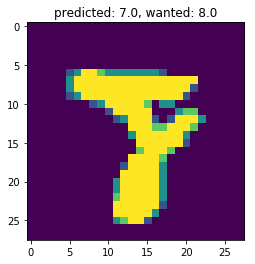

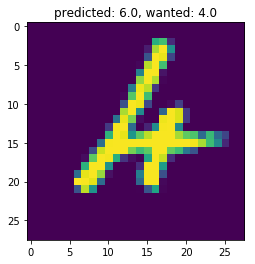

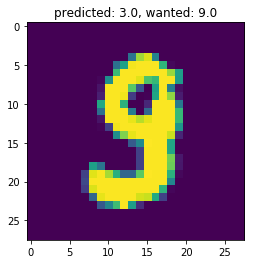

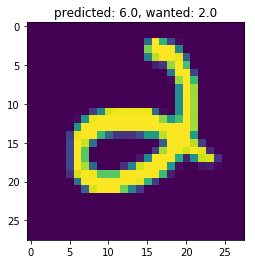

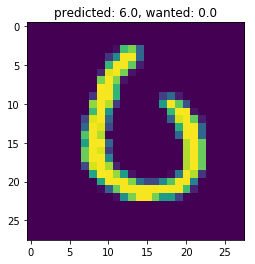

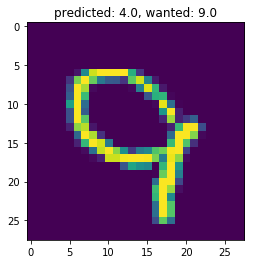

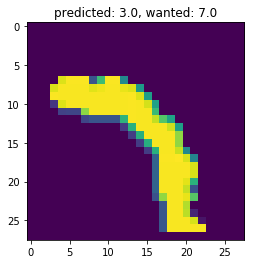

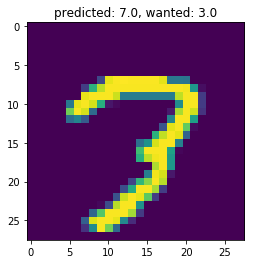

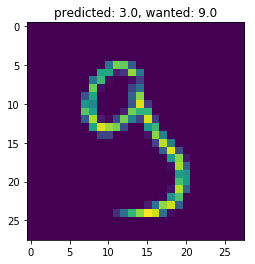

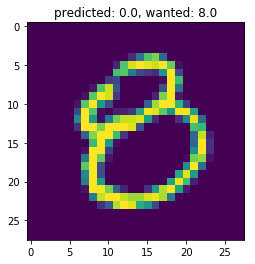

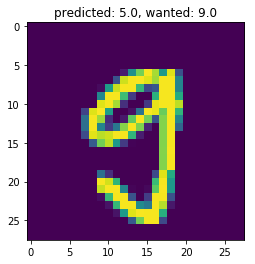

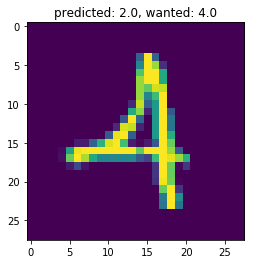

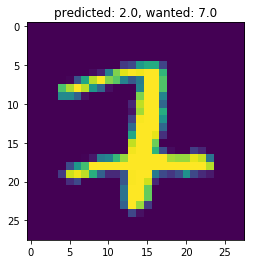

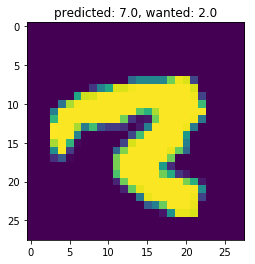

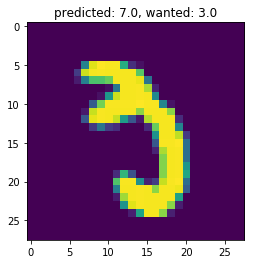

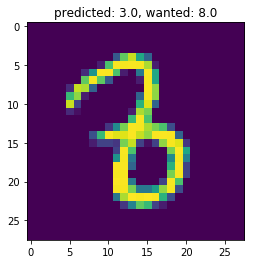

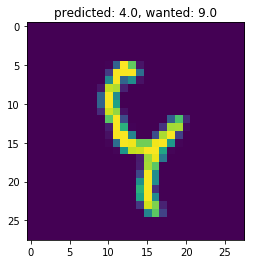

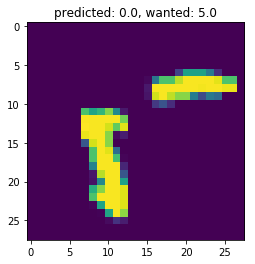

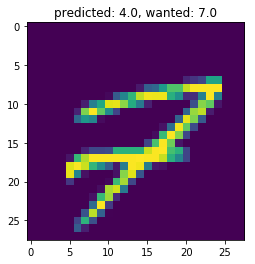

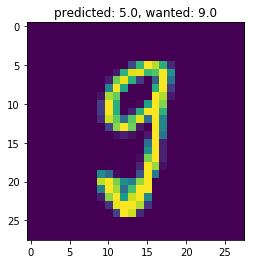

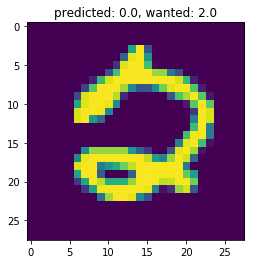

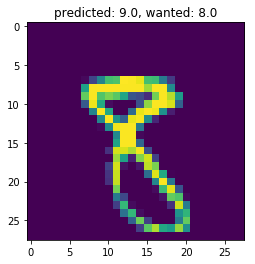

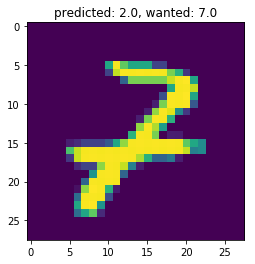

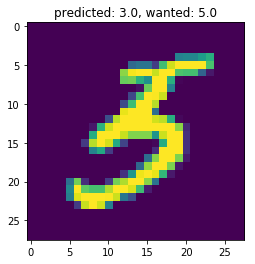

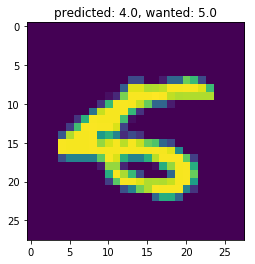

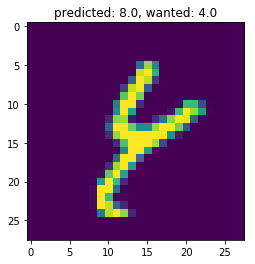

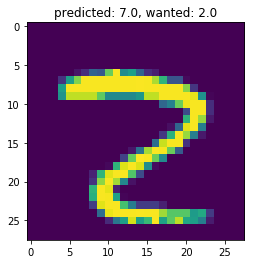

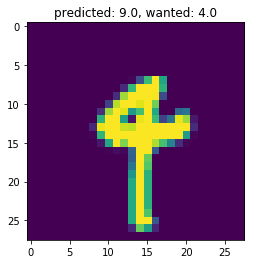

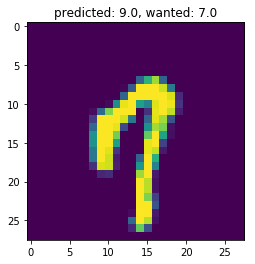

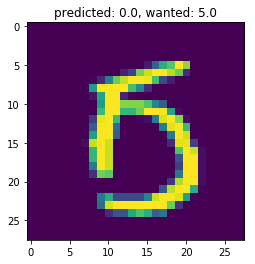

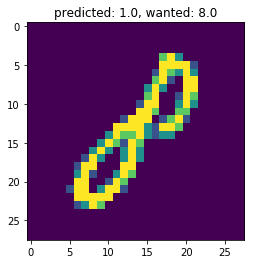

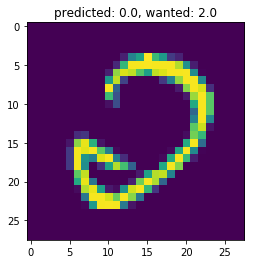

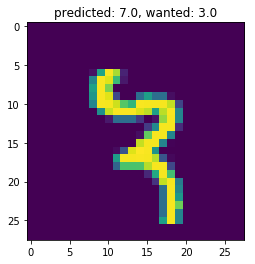

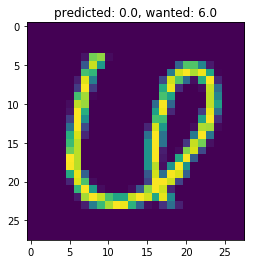

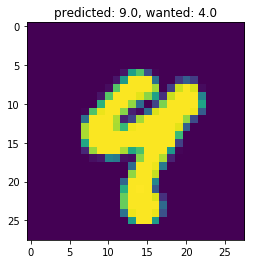

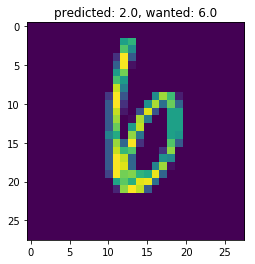

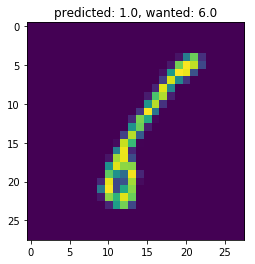

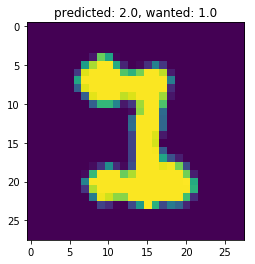

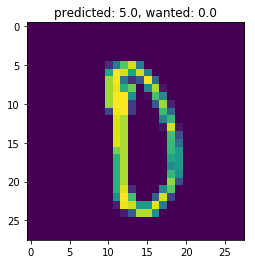

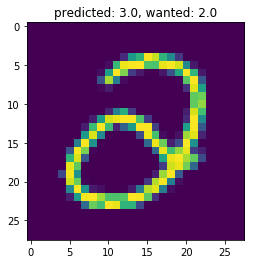

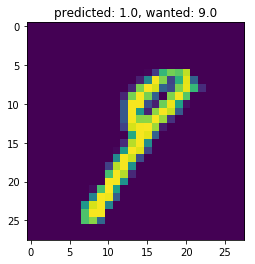

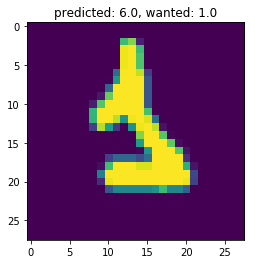

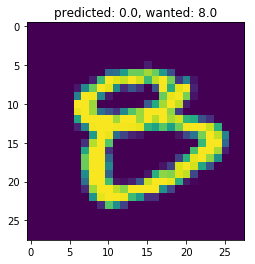

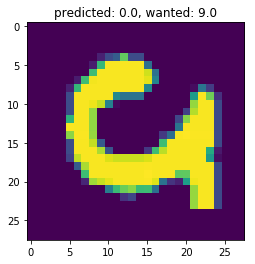

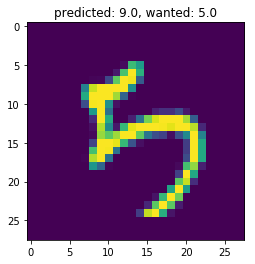

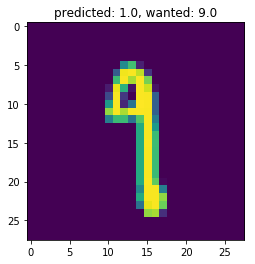

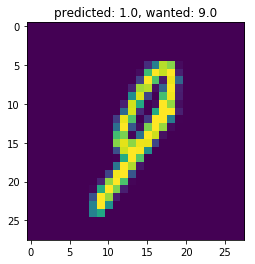

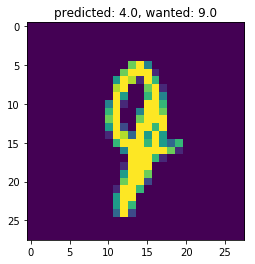

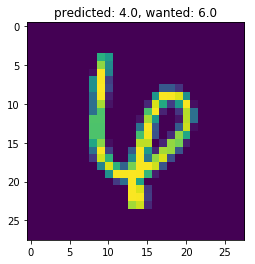

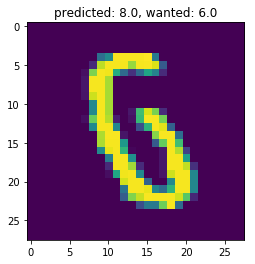

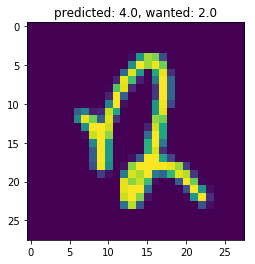

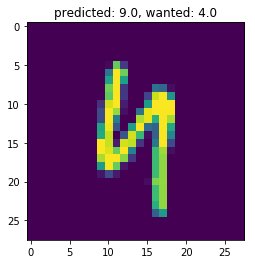

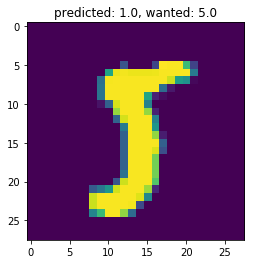

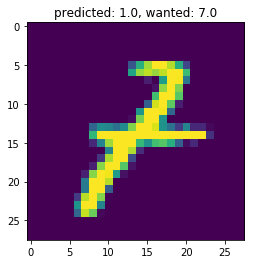

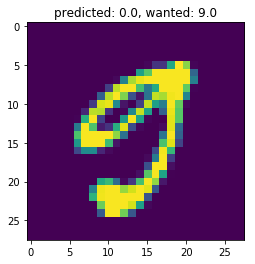

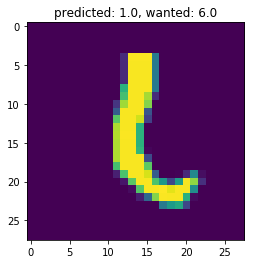

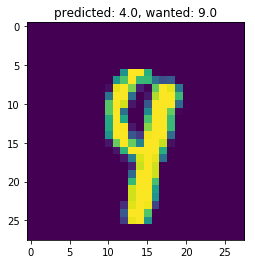

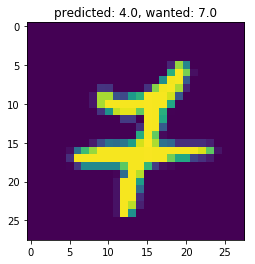

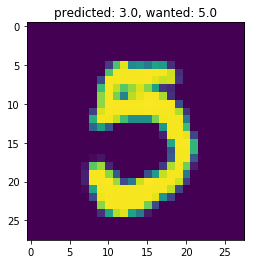

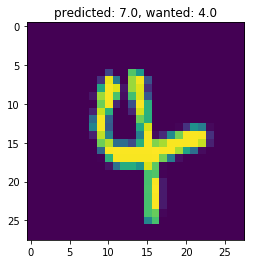

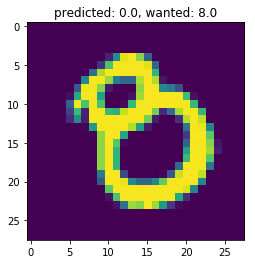

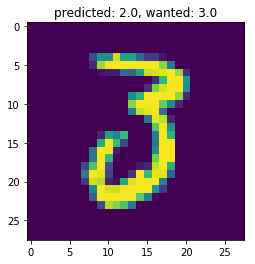

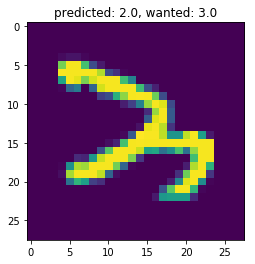

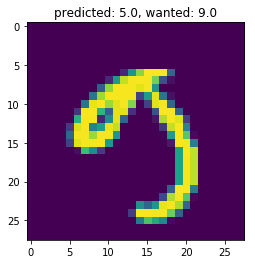

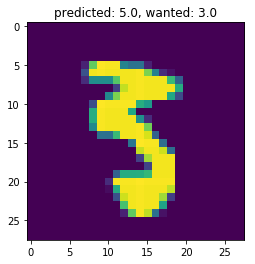

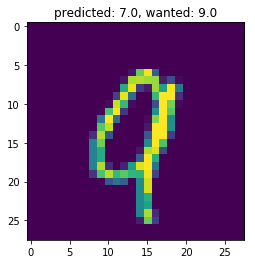

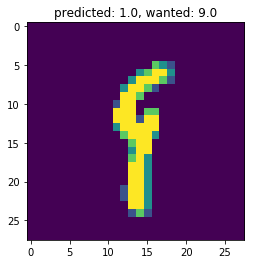

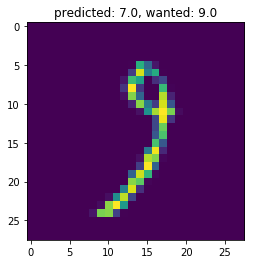

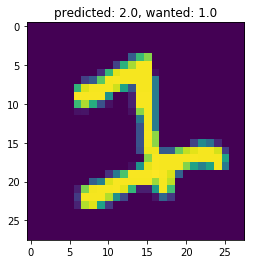

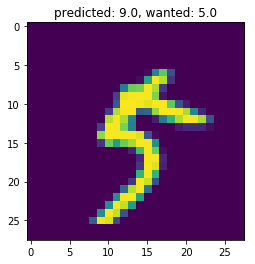

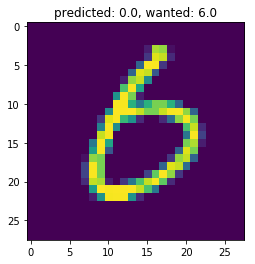

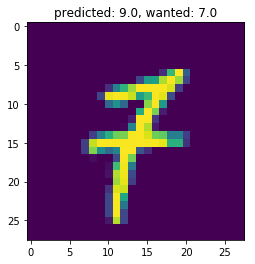

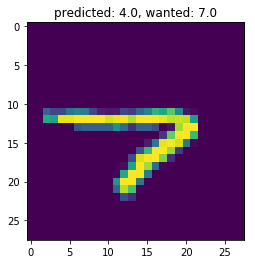

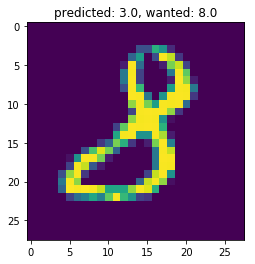

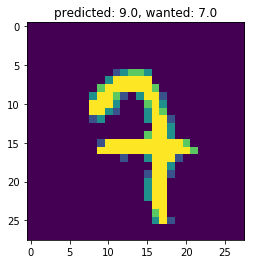

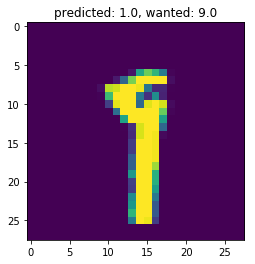

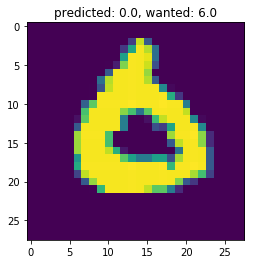

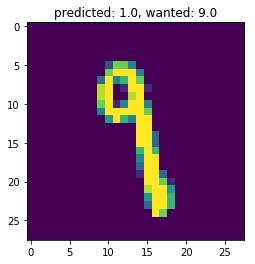

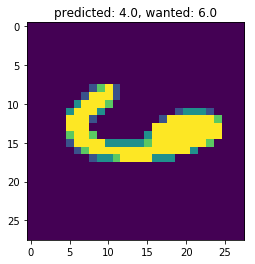

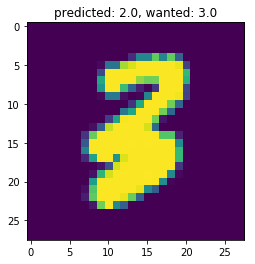

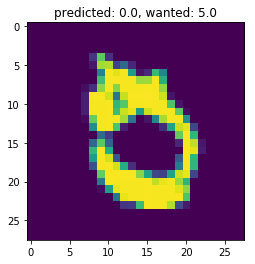

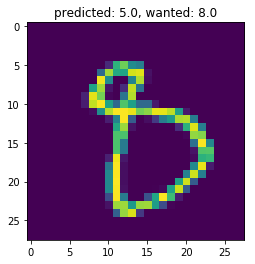

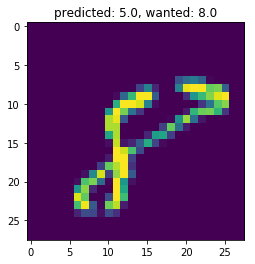

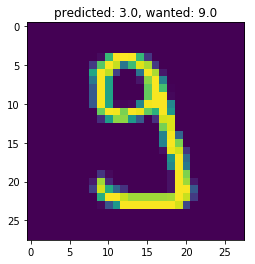

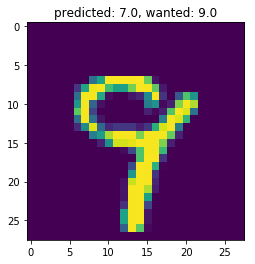

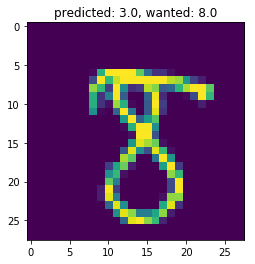

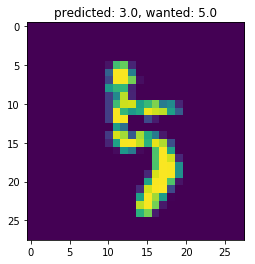

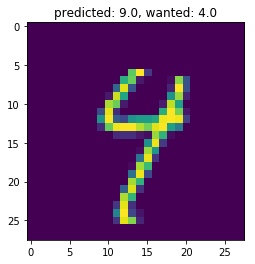

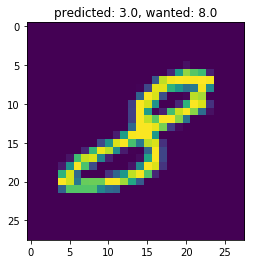

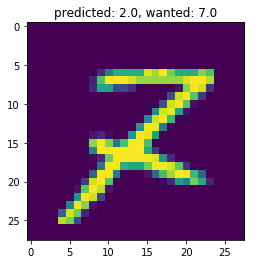

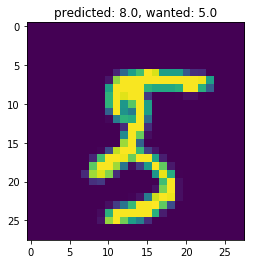

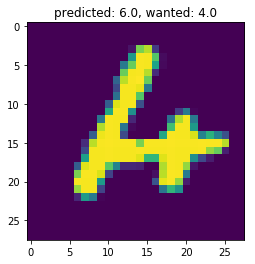

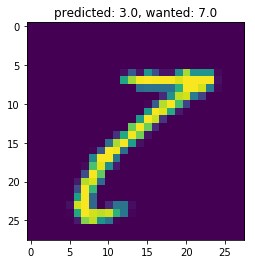

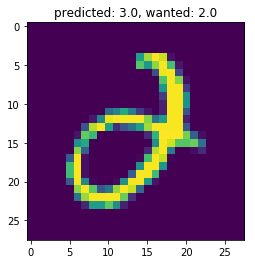

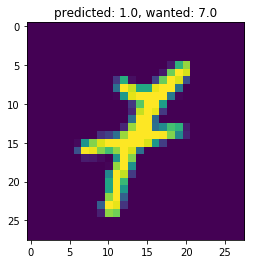

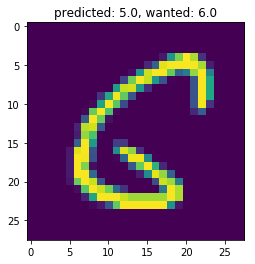

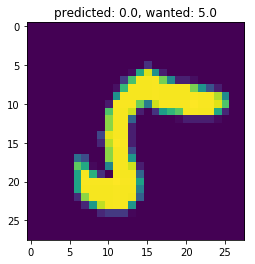

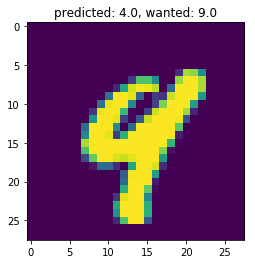

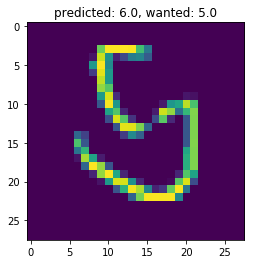

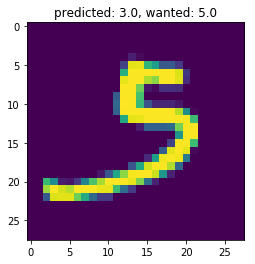

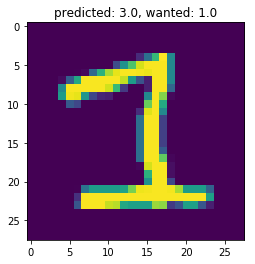

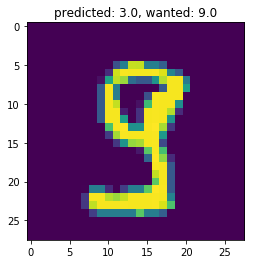

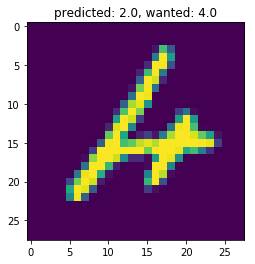

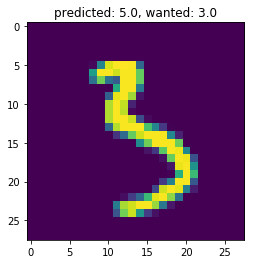

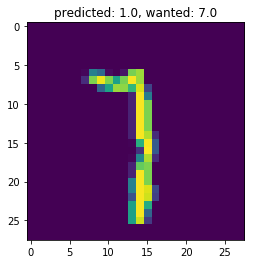

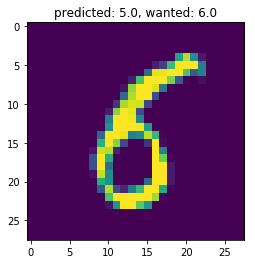

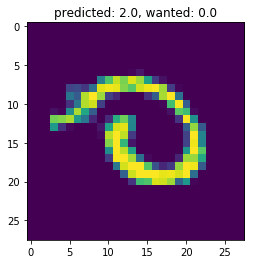

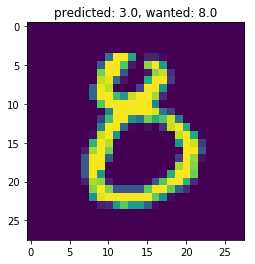

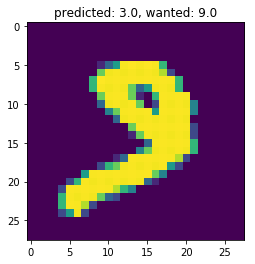

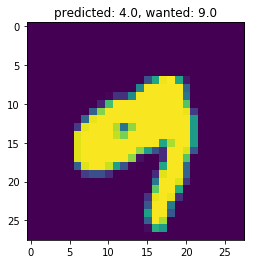

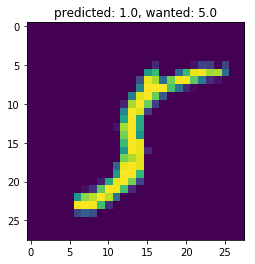

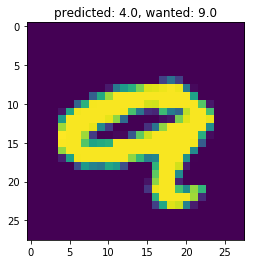

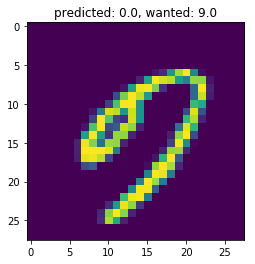

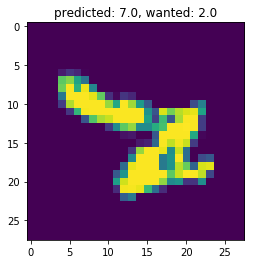

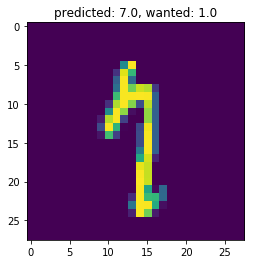

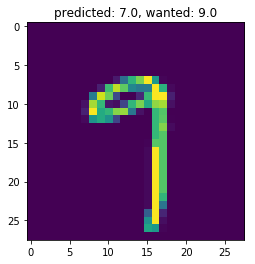

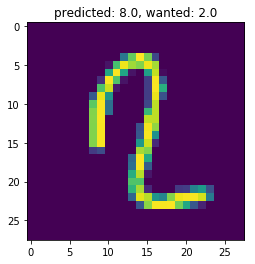

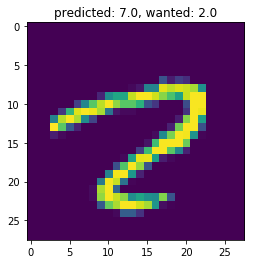

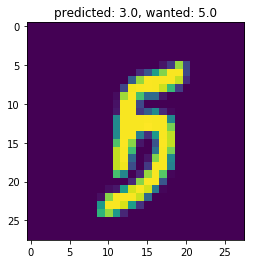

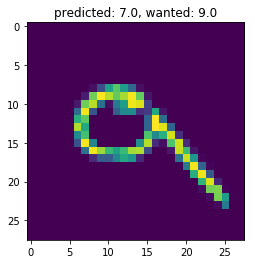

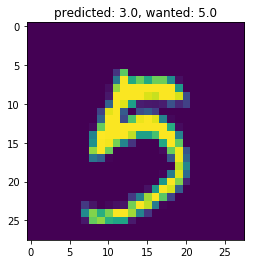

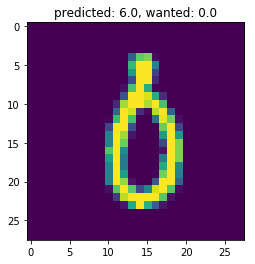

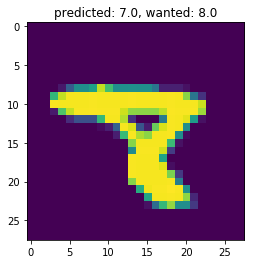

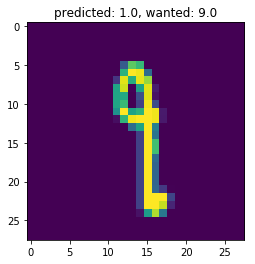

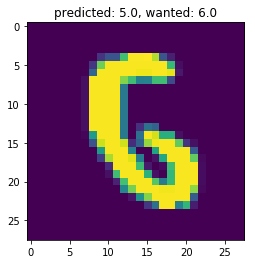

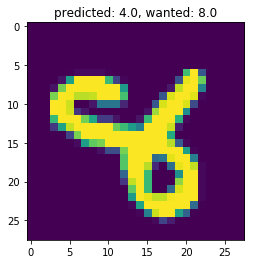

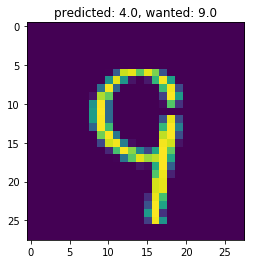

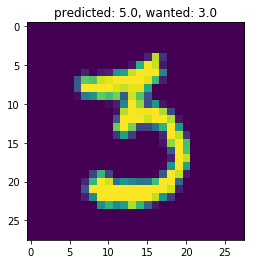

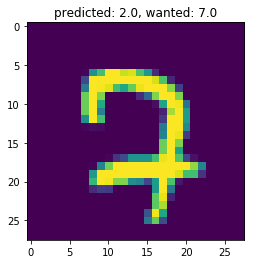

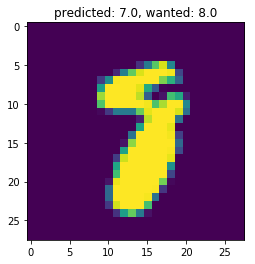

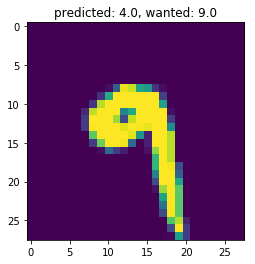

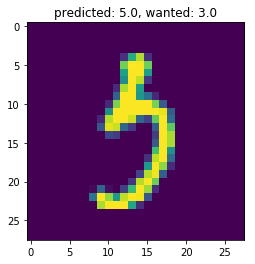

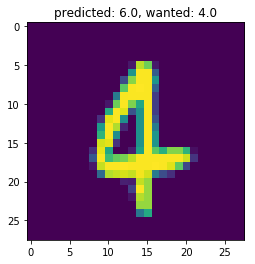

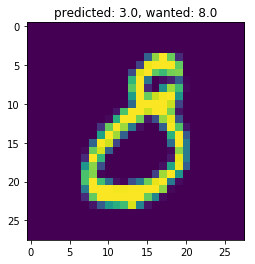

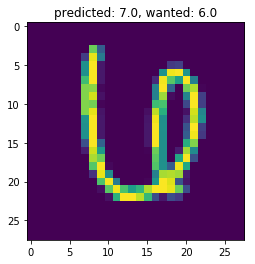

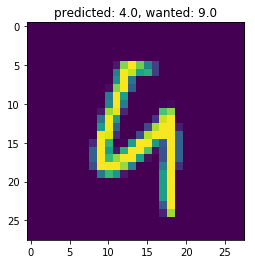

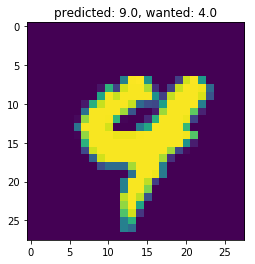

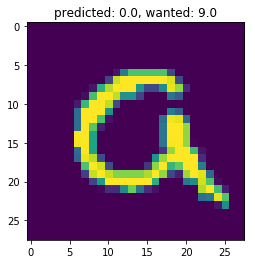

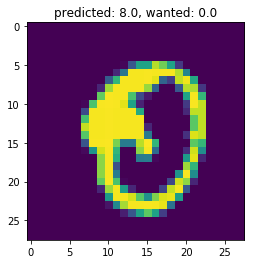

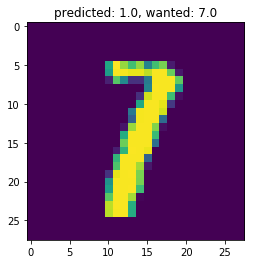

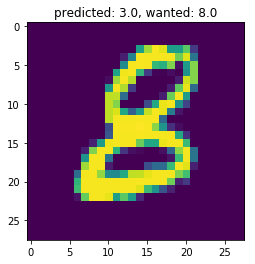

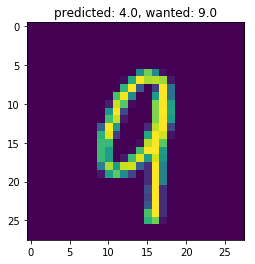

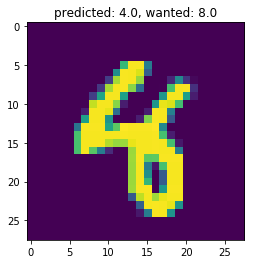

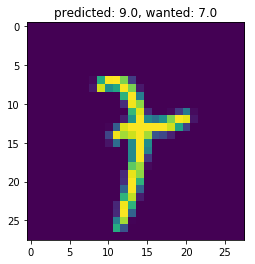

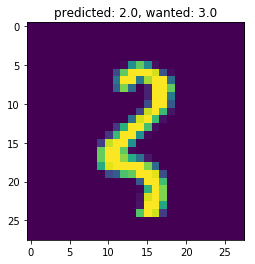

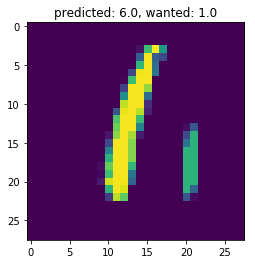

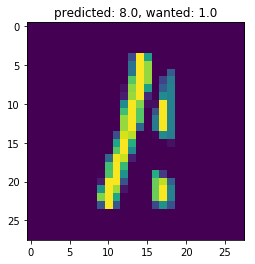

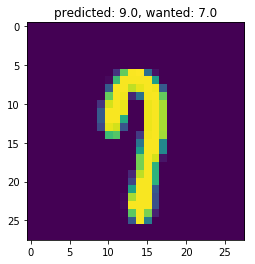

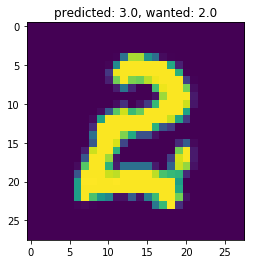

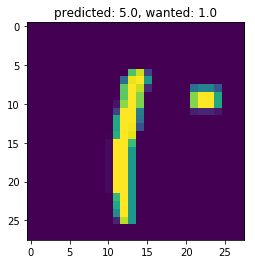

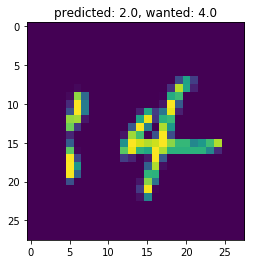

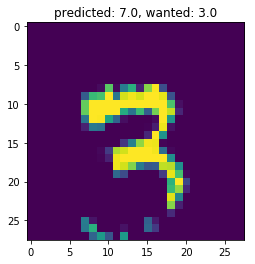

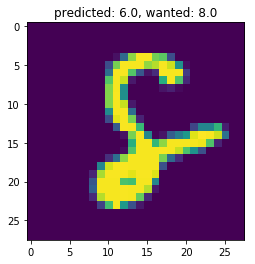

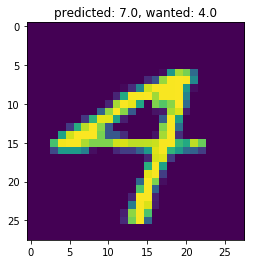

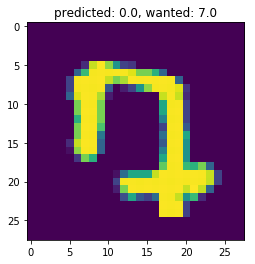

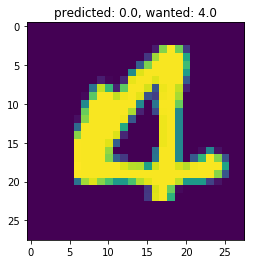

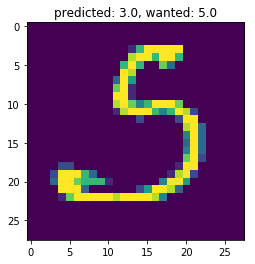

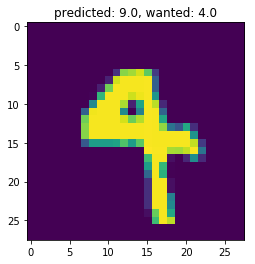

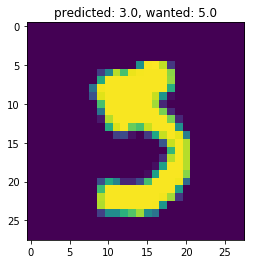

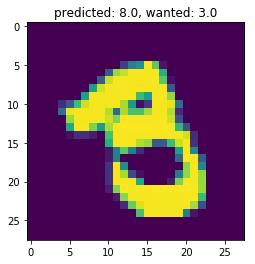

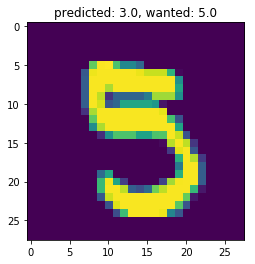

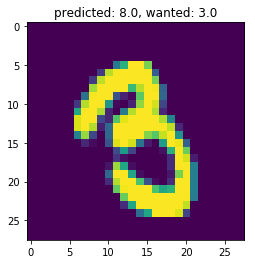

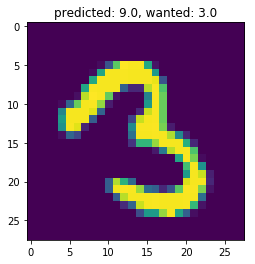

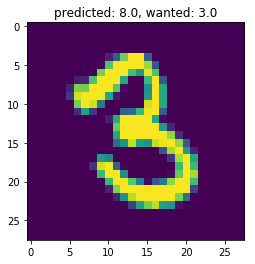

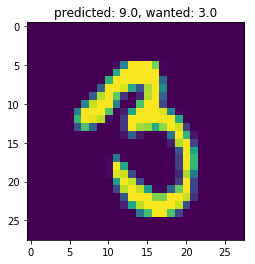

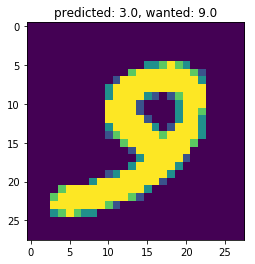

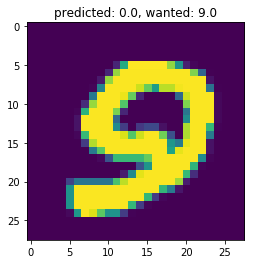

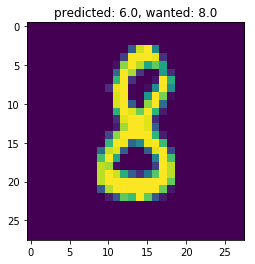

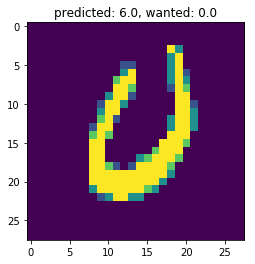

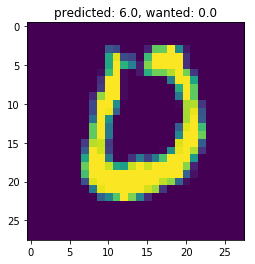

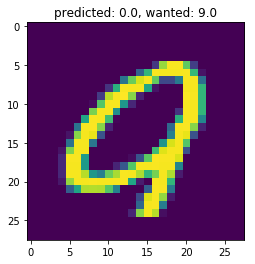

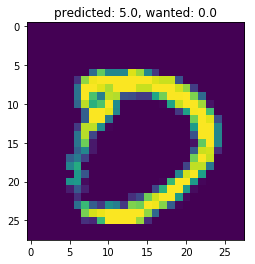

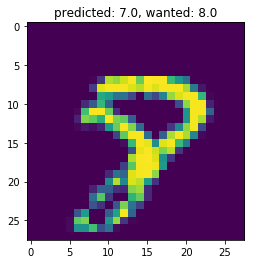

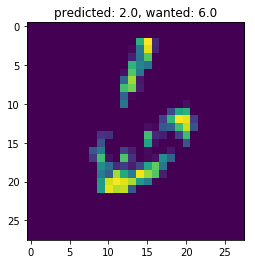

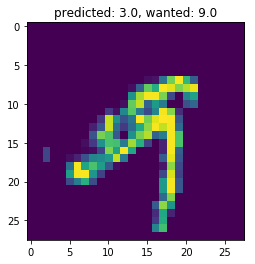

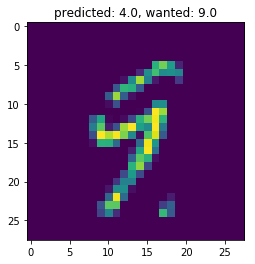

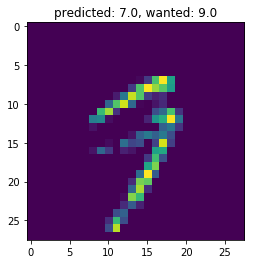

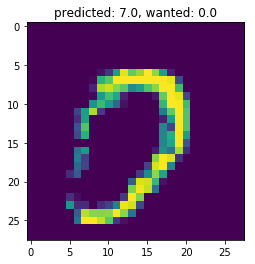

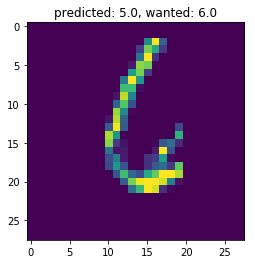

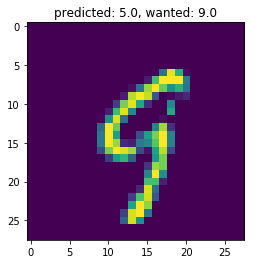

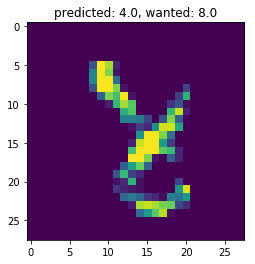

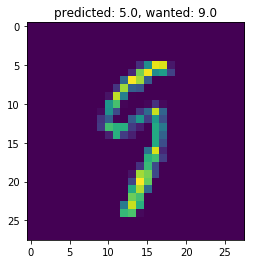

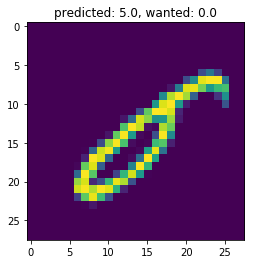

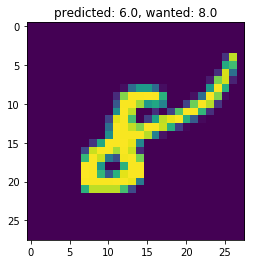

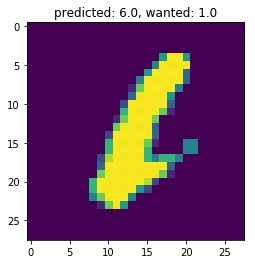

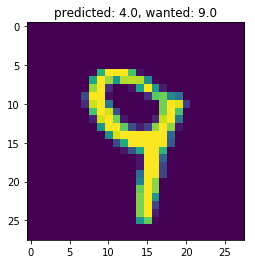

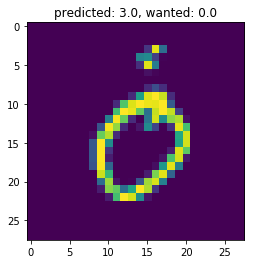

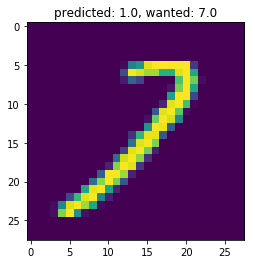

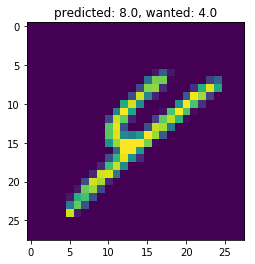

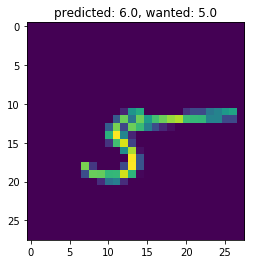

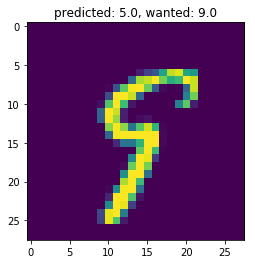

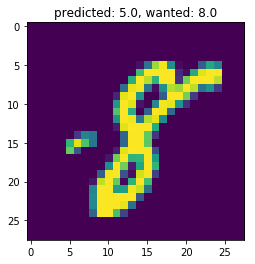

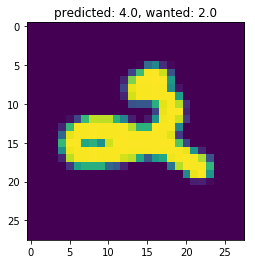

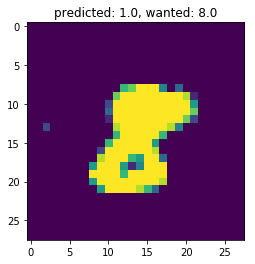

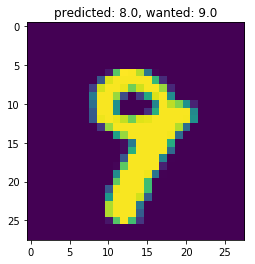

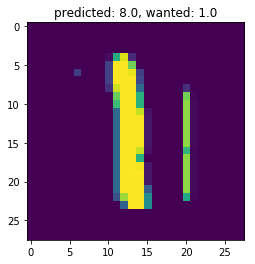

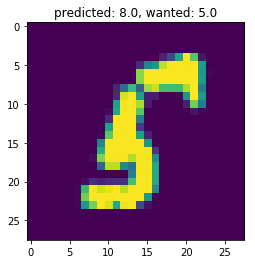

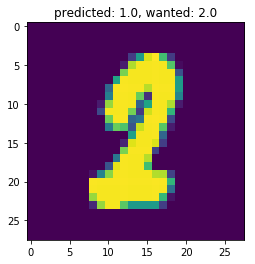

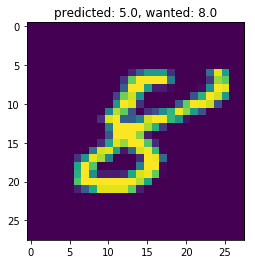

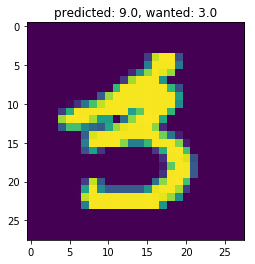

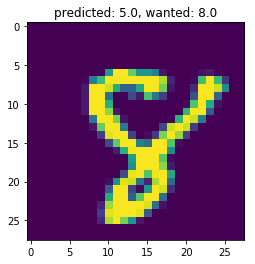

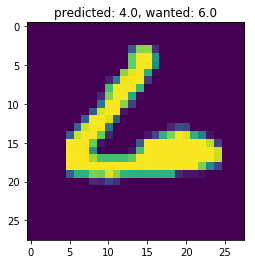

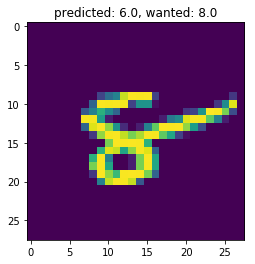

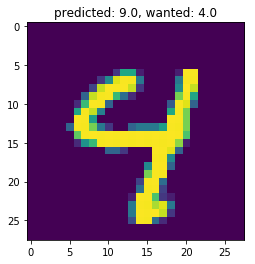

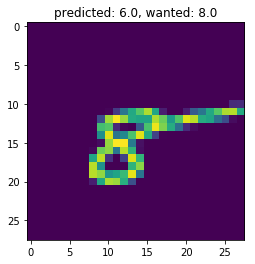

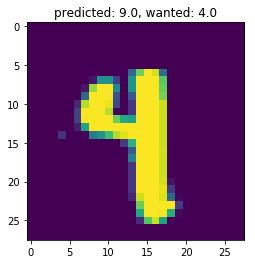

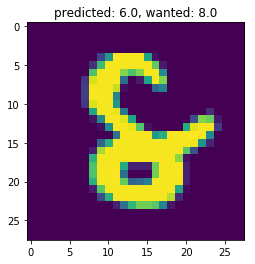

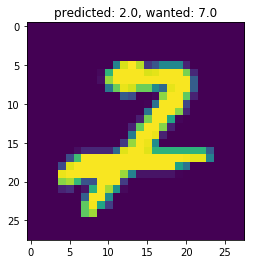

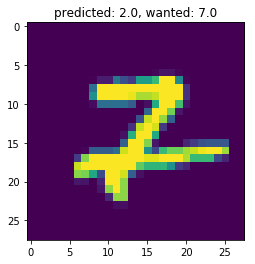

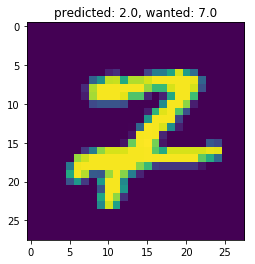

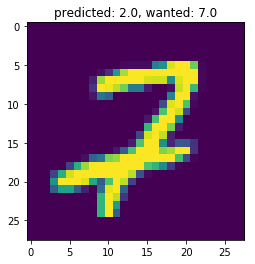

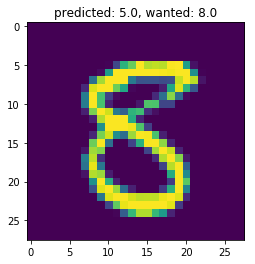

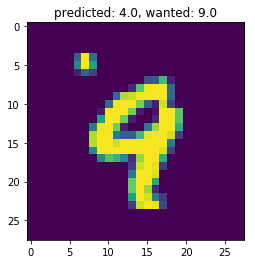

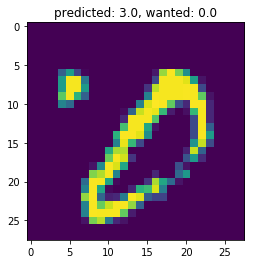

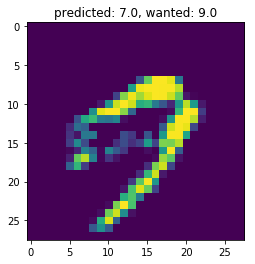

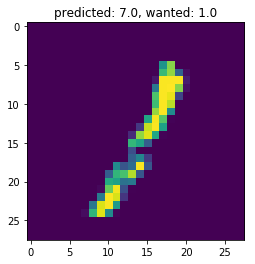

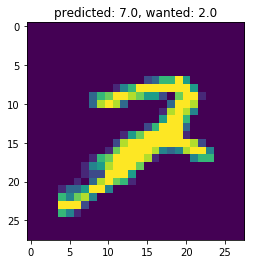

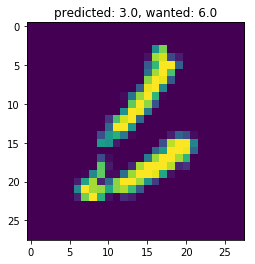

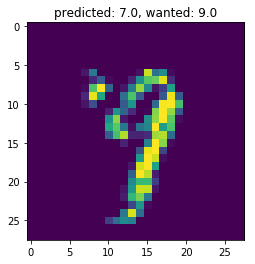

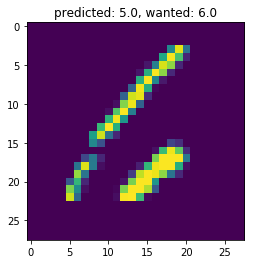

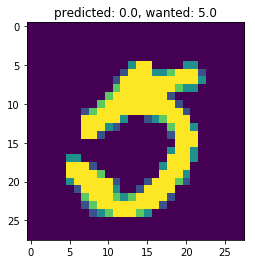

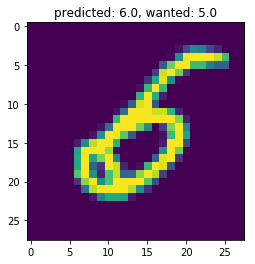

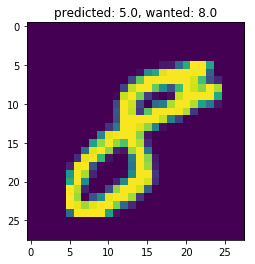

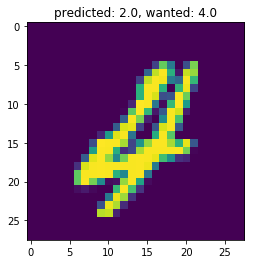

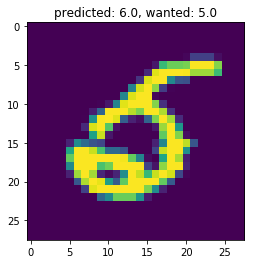

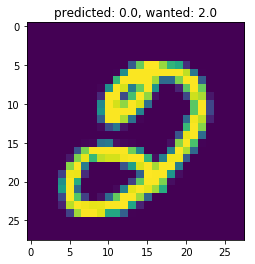

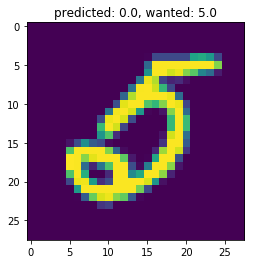

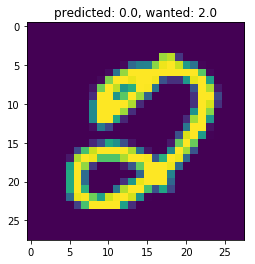

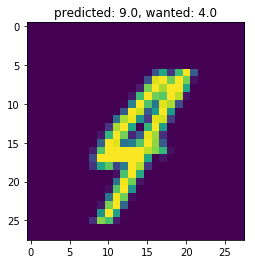

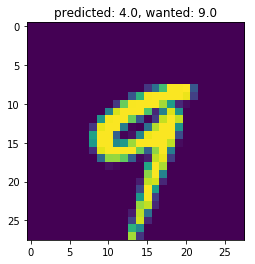

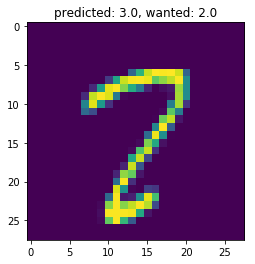

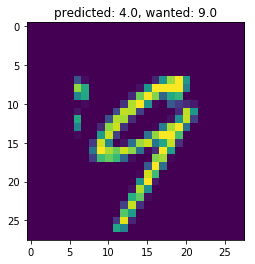

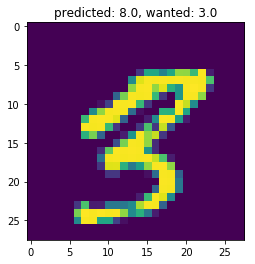

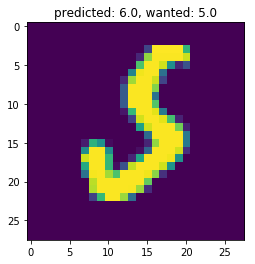

In [117]:
for test_id in test_data[best_id]["df_wrong_predicted"]:
    plt.imshow(images[test_id, 1:].reshape((28,28)))
    plt.title("predicted: {0}, wanted: {1}".format(stats[test_id][0], stats[test_id][1]))
    plt.show()